In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 


import functions


# the data is stored on the external ssd 
# the output should go to the local folder 


# per year



In [ ]:
# '/Volumes/T7 Shield/202409_paper2_modelruns/30years/SL_daily/1landcover_20percent'

In [ ]:
# folder path - data that sits on the SSD drive - outout of model runs 
# output_path - folder to save all the things, related to the scenario 
# dfspot - potential dfs = TL situation 

In [ ]:
%%time

# List of landcover indices and percentiles
landcover_indices = [1, 2, 3, 4, 5]
percentiles = ['20percent', '30percent', '40percent', '50percent', '60percent']
# percentiles = ['50percent', '60percent']
location = 'mustang'

method = 'daily'
column = 'dfs'  
freq = 'year'  

# Load elevation data once, outside the loops
elevation = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_{location}.csv')[['cellnr2', 'band_data']]

# Iterate over each percentile
for percentile in percentiles:
    # Define the output path for the current percentile
    output_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/SL_{method}/output_{percentile}'
    
    # Iterate over each landcover index
    for landcover_idx in landcover_indices:
        # folder_path = f'/Volumes/Extreme SSD/202409_paper2_modelruns/30years/SL_{method}/{landcover_idx}landcover_{percentile}/{location}_climate_cut'
        folder_path = f'/Volumes/T7 Shield/202409_paper2_modelruns/30years/SL_{method}/{landcover_idx}landcover_{percentile}/{location}_climate_cut'
        result_df = pd.DataFrame()

        # Iterate over the files in the folders
        for folder_name in os.listdir(folder_path):
            # Skip all csvs and hidden files
            if folder_name.endswith('.csv') or folder_name.startswith('.'):
                continue
            
            file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
            
            if os.path.isfile(file_path):
                # Read file
                output_df = pd.read_csv(file_path)
                # Count dfs per given time
                output_df = functions.count_dfs_per_time(output_df, column, freq)
                
                # Take the COUNT column
                name_column = output_df['count']
                # Rename the columns
                column_name = f'{column}_{folder_name}'
                result_df[column_name] = name_column
                result_df.columns = [col[-3:] for col in result_df.columns]

        # Add elevation data to the result_df
        annaul_df_count = functions.add_elevation_to_df_count(result_df, elevation, freq)

        # Save the resulting DataFrame to a CSV file for the current landcover index and percentile
        output_filename = f'{location}_annual_{column}_count{percentile}_landcover{landcover_idx}.csv'
        annaul_df_count.to_csv(os.path.join(output_path, output_filename))

        print(f"Processed {percentile} for landcover index {landcover_idx}")


# month

In [3]:
%%time

# List of landcover indices and percentiles
# landcover_indices = [1, 2, 3, 4, 5]
landcover_indices = [3, 5]
percentiles = ['40percent']#, '30percent', '40percent', '50percent', '60percent']

location = 'mustang'

method = 'daily'
column = 'Qdftl'  
freq = 'month'  

# Load elevation data once, outside the loops
elevation = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_{location}.csv')[['cellnr2', 'band_data']]

# Iterate over each percentile
for percentile in percentiles:
    # Define the output path for the current percentile
    output_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/TL/'
    
    # Iterate over each landcover index
    for landcover_idx in landcover_indices:
        folder_path = f'/Volumes/T7 Shield/202409_paper2_modelruns/30years/SL_{method}/{landcover_idx}landcover_{percentile}/{location}_climate_cut'

        result_df = pd.DataFrame()

        # Iterate over the files in the folders
        for folder_name in os.listdir(folder_path):
            # Skip all csvs and hidden files
            if folder_name.endswith('.csv') or folder_name.startswith('.'):
                continue
            
            file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
            
            if os.path.isfile(file_path):
                # Read file
                output_df = pd.read_csv(file_path)
                # Count dfs per given time
                output_df = functions.count_dfs_per_time(output_df, column, freq)
                
                # Take the COUNT column
                name_column = output_df['count']
                # Rename the columns
                column_name = f'{column}_{folder_name}'
                result_df[column_name] = name_column
                result_df.columns = [col[-3:] for col in result_df.columns]

        # Add elevation data to the result_df
        annaul_df_count = functions.add_elevation_to_df_count(result_df, elevation, freq)

        # Save the resulting DataFrame to a CSV file for the current landcover index and percentile
        output_filename = f'{location}_monthly_{column}_count_{percentile}_landcover{landcover_idx}.csv'
        annaul_df_count.to_csv(os.path.join(output_path, output_filename))

        print(f"Processed {percentile} for landcover index {landcover_idx}")


<timed exec>:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


default land cover. monthly data: same
Processed 40percent for landcover index 3
default land cover. monthly data: same
Processed 40percent for landcover index 5
CPU times: user 1min 45s, sys: 4.9 s, total: 1min 49s
Wall time: 1min 51s


# TL (dfspot count)

In [ ]:
%%time

# List of landcover indices and percentiles
# landcover_indices = [1, 2, 3, 4, 5]
percentiles = ['40percent']
landcover_indices = [3]


location = 'mustang'

method = 'daily'
column = 'dfspot'  
freq = 'month'

# Load elevation data once, outside the loops
elevation = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_{location}.csv')[['cellnr2', 'band_data']]

# Iterate over each percentile
for percentile in percentiles:
    # Define the output path for the current percentile
    output_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/TL/'
    
    # Iterate over each landcover index
    for landcover_idx in landcover_indices:
        folder_path = f'/Volumes/T7 Shield/202409_paper2_modelruns/30years/SL_{method}/{landcover_idx}landcover_{percentile}/{location}_climate_cut'
        result_df = pd.DataFrame()

        # Iterate over the files in the folders
        for folder_name in os.listdir(folder_path):
            # Skip all csvs and hidden files
            if folder_name.endswith('.csv') or folder_name.startswith('.'):
                continue
            
            file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
            
            if os.path.isfile(file_path):
                # Read file
                output_df = pd.read_csv(file_path)
                # Count dfs per given time
                output_df = functions.count_dfs_per_time(output_df, column, freq)
                
                # Take the COUNT column
                name_column = output_df['count']
                # Rename the columns
                column_name = f'{column}_{folder_name}'
                result_df[column_name] = name_column
                result_df.columns = [col[-3:] for col in result_df.columns]

        # Add elevation data to the result_df
        annaul_df_count = functions.add_elevation_to_df_count(result_df, elevation, freq)

        # Save the resulting DataFrame to a CSV file for the current landcover index and percentile
        output_filename = f'{location}_monthly_{column}_count_{percentile}_landcover{landcover_idx}.csv'
        annaul_df_count.to_csv(os.path.join(output_path, output_filename))

        print(f"Processed {percentile} for landcover index {landcover_idx}")


In [ ]:
# output_df

In [4]:
test = pd.read_csv('/Volumes/T7 Shield/202409_paper2_modelruns/30years/SL_daily/3landcover_40percent/mustang_climate_cut/13b/Sediment.out')

test


,D,Q0,Q10,Q25,Q50,Q75,Q90,Q100,dfs,so,sopot,dfspot,conc,concpot,sc,ls,Qstl,Qdftl
0,1989-09-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1989-09-02 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,1989-09-02 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,1989-09-02 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,1989-09-02 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289963,2022-09-30 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.047068,0.0,0.0,0.0
289964,2022-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.047068,0.0,0.0,0.0
289965,2022-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.047068,0.0,0.0,0.0
289966,2022-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.047068,0.0,0.0,0.0


In [5]:
def count_dfs_per_time(sediments, column, freq):
    '''
    sediments - sediment output file
    column - column of interest (e.g. dfs)
    freq - resampling frequency
    '''

    sediments['D'] = pd.to_datetime(sediments.D)
    sediments = sediments.set_index('D')
    sediments = sediments[sediments[column] > 0]
    sediments['count'] = sediments[column].apply(lambda x: 1 if x != 0 else 0)

    
    if freq == 'month':
        # calculate how many dfs are there per month 
        sym = sediments.resample('m').sum()
        return sym
    
    elif freq == 'year':
        # calculate how many dfs are there per year 
        sym_year = sediments.resample('Y').sum()
        return sym_year



testdf = functions.count_dfs_per_time(test, 'dfspot', 'month')


In [18]:
testdf = testdf.reset_index()
testdf['Dyear'] = testdf.D.dt.year

testdf['Dmonth'] = testdf.D.dt.month

testdf['dateid'] = testdf['Dyear'].astype(str) + "_" + testdf['Dmonth'].astype(str).str.zfill(2)

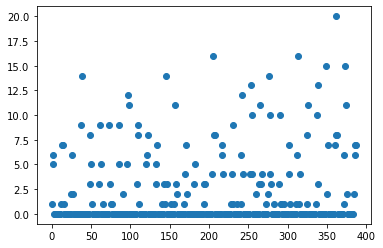

In [25]:
plt.scatter(testdf['index'], testdf['count'])


In [13]:
testdf.count.plot()

AttributeError: 'function' object has no attribute 'plot'

In [ ]:
%%time

# List of landcover indices and percentiles
landcover_indices = [1, 2, 3, 4, 5]
percentiles = ['40percent']

location = 'mustang'

method = 'daily'
column = 'dfspot'  
freq = 'month'  

# Load elevation data once, outside the loops
elevation = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/downscaling_simple/coordinates_and_elevation_with_labels_{location}.csv')[['cellnr2', 'band_data']]

# Iterate over each percentile
for percentile in percentiles:
    # Define the output path for the current percentile
    output_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/TL/'
    
    # Iterate over each landcover index
    for landcover_idx in landcover_indices:
        folder_path = f'/Volumes/T7 Shield/202409_paper2_modelruns/30years/SL_{method}/{landcover_idx}landcover_{percentile}/{location}_climate_cut'
        # folder_path = f'/Volumes/Extreme SSD/202409_paper2_modelruns/30years/SL_{method}/{landcover_idx}landcover_{percentile}/{location}_climate_cut'
        result_df = pd.DataFrame()

        # Iterate over the files in the folders
        for folder_name in os.listdir(folder_path):
            # Skip all csvs and hidden files
            if folder_name.endswith('.csv') or folder_name.startswith('.'):
                continue
            
            file_path = os.path.join(folder_path, folder_name, 'Sediment.out')
            
            if os.path.isfile(file_path):
                # Read file
                output_df = pd.read_csv(file_path)
                # Count dfs per given time
                output_df = functions.count_dfs_per_time(output_df, column, freq)
                
                # Take the COUNT column
                name_column = output_df['count']
                # Rename the columns
                column_name = f'{column}_{folder_name}'
                result_df[column_name] = name_column
                result_df.columns = [col[-3:] for col in result_df.columns]

        # Add elevation data to the result_df
        annaul_df_count = functions.add_elevation_to_df_count(result_df, elevation, freq)

        # Save the resulting DataFrame to a CSV file for the current landcover index and percentile
        output_filename = f'{location}_monthly_{column}_count_landcover{landcover_idx}.csv'
        annaul_df_count.to_csv(os.path.join(output_path, output_filename))

        print(f"Processed {percentile} for landcover index {landcover_idx}")


In [ ]:
def count_dfs_per_time(sediments, column, freq):
    '''
    sediments - sediment output file
    column - column of interest (e.g. dfs)
    freq - resampling frequency
    '''

    sediments['D'] = pd.to_datetime(sediments.D)
    sediments = sediments.set_index('D')
    sediments = sediments[sediments[column] > 0]
    sediments['count'] = sediments[column].apply(lambda x: 1 if x != 0 else 0)

    
    if freq == 'month':
        # calculate how many dfs are there per month 
        sym = sediments.resample('m').sum()
        return sym
    
    elif freq == 'year':
        # calculate how many dfs are there per year 
        sym_year = sediments.resample('Y').sum()
        return sym_year
